In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/pc/Downloads/RM/Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:/Users/pc/Downloads/RM/Dataset\heart_failure_clinical_records_dataset.csv


### 1. Exploratory Analysis

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("C:/Users/pc/Downloads/RM/Dataset/heart_failure_clinical_records_dataset.csv")

In [5]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
data.shape

(299, 13)

* **We have 299 cases with 13 feature to discover**  

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


* **All of our features are numerical including target feature**

In [57]:
data.isnull().sum().sort_values(ascending = False)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

* **We have 0 missing values**

In [9]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


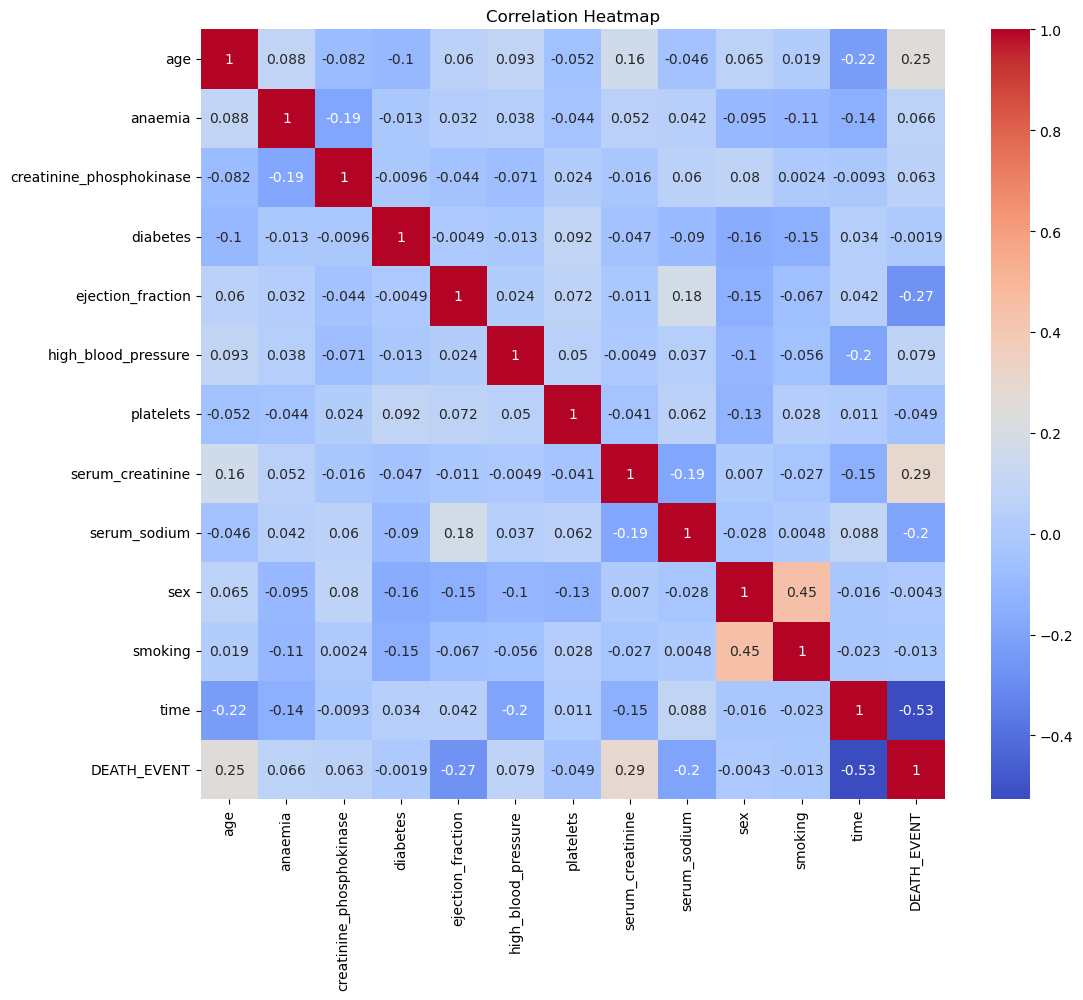

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the DataFrame
df = pd.read_csv("C:/Users/pc/Downloads/RM/Dataset/heart_failure_clinical_records_dataset.csv")

# Create the correlation matrix
corr_matrix = df.corr()

# Generate the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [10]:
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

#### NOTE: Imbalanced Dataset SO
* We undersample or we use other metrics rather than accuracy

In [11]:
data.groupby(["high_blood_pressure",'sex']).count()['DEATH_EVENT']

high_blood_pressure  sex
0                    0       61
                     1      133
1                    0       44
                     1       61
Name: DEATH_EVENT, dtype: int64

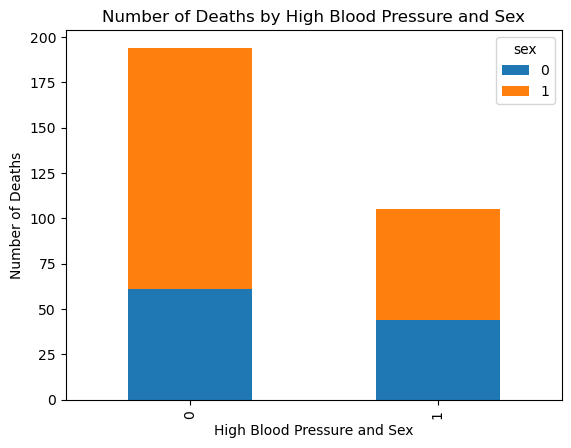

In [56]:
import matplotlib.pyplot as plt

# group the data by high_blood_pressure and sex and count the number of occurrences of DEATH_EVENT for each group
death_counts = data.groupby(['high_blood_pressure', 'sex'])['DEATH_EVENT'].count().unstack()

# plot the stacked bar chart
death_counts.plot(kind='bar', stacked=True)

# set the title and axis labels
plt.title('Number of Deaths by High Blood Pressure and Sex')
plt.xlabel('High Blood Pressure and Sex')
plt.ylabel('Number of Deaths')

# show the plot
plt.show()


### 2. Models Evaluation


In [12]:
from sklearn.model_selection import train_test_split
X = data.drop('DEATH_EVENT' , axis = 1)
y = data.DEATH_EVENT

In [13]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,y=sm.fit_resample(X,y)

In [14]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 42 , shuffle = True)

In [15]:
##from sklearn.preprocessing import StandardScaler
##scale = StandardScaler()

#x_train_scaled = scale.fit_transform(x_train , y_train)
#x_test_scaled = scale.fit_transform(x_test , y_test)

In [16]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV , cross_val_score , KFold

In [17]:
def evaluate_model(model, X, y):
    cv = KFold(n_splits=5, random_state=42 , shuffle = True)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
    return scores

In [18]:
print(f"Range of SVC possible model accuracies: {evaluate_model(SVC() , x_train , y_train).round(2)} with a mean of {evaluate_model(SVC() , x_train , y_train).mean().round(2)}")


Range of SVC possible model accuracies: [0.43 0.52 0.44 0.44 0.52] with a mean of 0.47


In [19]:
print(f"Range of LogisticRegression possible model accuracies: {evaluate_model(LogisticRegression() , x_train , y_train).round(2)} with a mean of {evaluate_model(LogisticRegression() , x_train , y_train).mean().round(2)}")


Range of LogisticRegression possible model accuracies: [0.8  0.75 0.8  0.7  0.73] with a mean of 0.76


In [20]:
print(f"Range of RandomForestClassifier possible model accuracies: {evaluate_model(RandomForestClassifier() , x_train , y_train).round(2)} with a mean of {evaluate_model(RandomForestClassifier() , x_train , y_train).mean().round(2)}")


Range of RandomForestClassifier possible model accuracies: [0.85 0.89 0.93 0.89 0.88] with a mean of 0.88


In [58]:
from tabulate import tabulate

svc_accs = evaluate_model(SVC(), x_train, y_train)
logreg_accs = evaluate_model(LogisticRegression(), x_train, y_train)
rf_accs = evaluate_model(RandomForestClassifier(), x_train, y_train)

table = [
    ['SVC', svc_accs.mean().round(2), svc_accs.min().round(2), svc_accs.max().round(2)],
    ['LogisticRegression', logreg_accs.mean().round(2), logreg_accs.min().round(2), logreg_accs.max().round(2)],
    ['RandomForestClassifier', rf_accs.mean().round(2), rf_accs.min().round(2), rf_accs.max().round(2)]
]

headers = ['Model', 'Mean Accuracy', 'Min Accuracy', 'Max Accuracy']

print(tabulate(table, headers=headers))


Model                     Mean Accuracy    Min Accuracy    Max Accuracy
----------------------  ---------------  --------------  --------------
SVC                                0.47            0.43            0.52
LogisticRegression                 0.76            0.7             0.8
RandomForestClassifier             0.88            0.82            0.95


* **Glimpse of what each model is capable of** 

In [21]:
svc_params = [{'gamma': [0.001 , 0.01 , 0.1 , 1 , 10 , 100],   'C' : [0.001 , 0.01 , 0.1 , 1 , 10 , 100] }]

In [22]:
log_parmas =  [{'C' : [0.001 , 0.01 , 0.1 , 1 , 10 , 100]}]

In [23]:
rfc_params = { "max_depth" : [4,5,6,7,8],'criterion' :['gini', 'entropy']}

In [24]:
def search_grid(model , X , y , param):
    gsvc = GridSearchCV(model , param ,cv = 5)
    return gsvc.fit(X,y)

In [25]:
svc_grid = search_grid(SVC() , x_train , y_train , svc_params)

In [26]:
pd.DataFrame(data = svc_grid.cv_results_ , columns = ["param_C" , "param_gamma" , "mean_test_score" , "rank_test_score"]).round(2).sort_values("rank_test_score").head()

,param_C,param_gamma,mean_test_score,rank_test_score
24,10,0.001,0.54,1
30,100,0.001,0.54,1
18,1,0.001,0.54,3
31,100,0.01,0.53,4
25,10,0.01,0.53,4


In [27]:
log_grid = search_grid(LogisticRegression() , x_train , y_train , log_parmas)

In [28]:
pd.DataFrame(data = log_grid.cv_results_ , columns = ["param_C" , "mean_test_score" ,"rank_test_score"]).round(2).sort_values("rank_test_score")

,param_C,mean_test_score,rank_test_score
1,0.01,0.77,1
2,0.1,0.77,2
4,10,0.77,2
5,100,0.77,2
0,0.001,0.77,5
3,1,0.74,6


In [29]:
rfc_grid = search_grid(RandomForestClassifier() , x_train , y_train , rfc_params)

In [30]:
pd.DataFrame(data = rfc_grid.cv_results_ , columns = ["param_max_depth" , "param_criterion" ,"mean_test_score" , "rank_test_score"]).round(3).sort_values("rank_test_score").head()

,param_max_depth,param_criterion,mean_test_score,rank_test_score
1,5,gini,0.879,1
5,4,entropy,0.878,2
2,6,gini,0.875,3
9,8,entropy,0.875,3
3,7,gini,0.872,5


### 3. Model Creation

In [31]:
svc = SVC(C = 0.001 , gamma = 0.001).fit(x_train , y_train)


In [32]:
logreg = LogisticRegression(C = 0.001).fit(x_train , y_train)

In [33]:
rfc = RandomForestClassifier(max_depth = 4).fit(x_train , y_train)

In [34]:
print(f"SVC Training Score: {svc.score(x_train , y_train)}")
print(f"SVC Testing Score: {svc.score(x_test , y_test)}")

SVC Training Score: 0.5328947368421053
SVC Testing Score: 0.5098039215686274


In [35]:
print(f"LogisticRegression Training Score: {logreg.score(x_train , y_train)}")
print(f"LogisticRegression Testing Score: {logreg.score(x_test , y_test)}")

LogisticRegression Training Score: 0.7730263157894737
LogisticRegression Testing Score: 0.7941176470588235


In [36]:
print(f"RandomForestClassifier Training Score: {rfc.score(x_train , y_train)}")
print(f"RandomForestClassifier Testing Score: {rfc.score(x_test , y_test)}")

RandomForestClassifier Training Score: 0.9407894736842105
RandomForestClassifier Testing Score: 0.8627450980392157


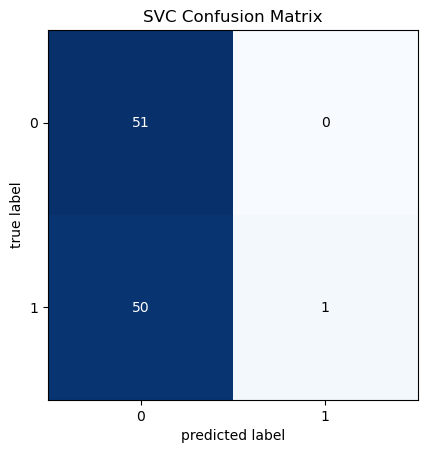

In [37]:
from sklearn.metrics import confusion_matrix 
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(confusion_matrix(y_test , svc.predict(x_test)))
plt.title("SVC Confusion Matrix")
plt.show()

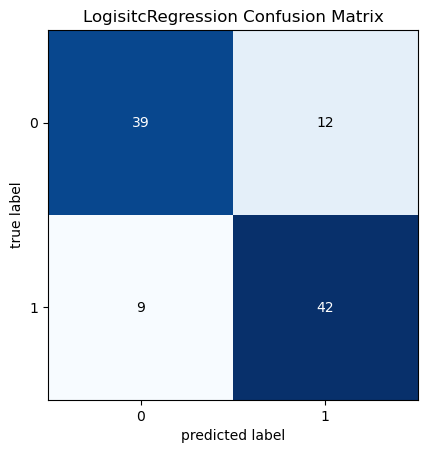

In [38]:
plot_confusion_matrix(confusion_matrix(y_test , logreg.predict(x_test)))
plt.title("LogisitcRegression Confusion Matrix")
plt.show()

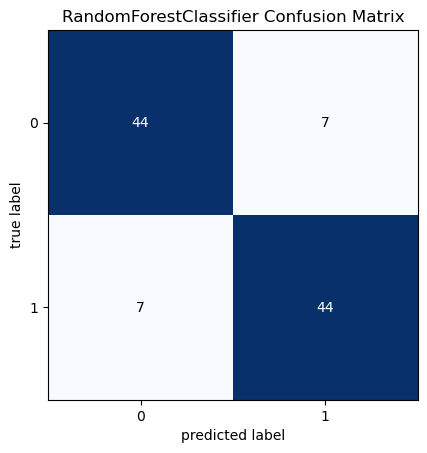

In [39]:
plot_confusion_matrix(confusion_matrix(y_test , rfc.predict(x_test)))
plt.title("RandomForestClassifier Confusion Matrix")
plt.show()

In [40]:
from sklearn.metrics import precision_recall_curve

In [41]:
svc_precision , svc_recall , _ = precision_recall_curve(y_test , svc.decision_function(x_test))

In [42]:
log_precision , log_recall , _ = precision_recall_curve(y_test , logreg.decision_function(x_test))

In [43]:
rfc_precision , rfc_recall , _ = precision_recall_curve(y_test ,  rfc.predict_proba(x_test)[: , 1])

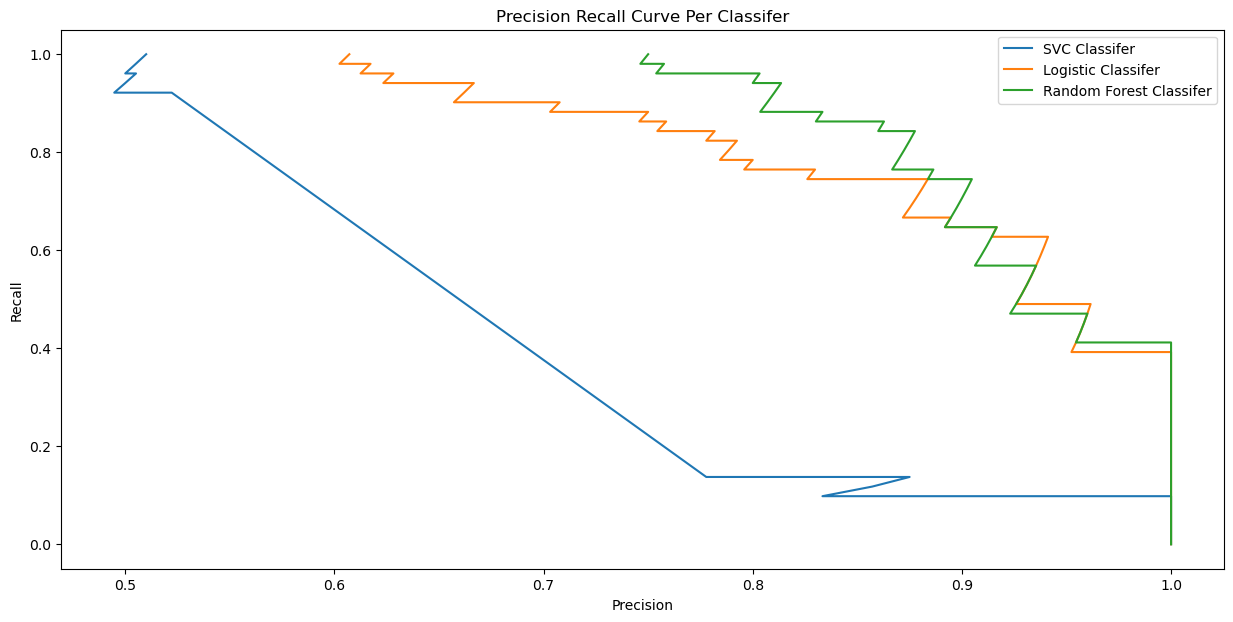

In [44]:
plt.figure(figsize = (15,7))
plt.title('Precision Recall Curve Per Classifer')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.plot(svc_precision , svc_recall , label = "SVC Classifer")
plt.plot(log_precision , log_recall , label = "Logistic Classifer")
plt.plot(rfc_precision , rfc_recall , label = "Random Forest Classifer")
plt.legend()
plt.show()

* **Logistic Regression seems the most suitable as we will not trade much of precision for better recall score**

In [45]:
from sklearn.metrics import classification_report
print(f"SVC {classification_report(y_test , svc.predict(x_test))}")

SVC               precision    recall  f1-score   support

           0       0.50      1.00      0.67        51
           1       1.00      0.02      0.04        51

    accuracy                           0.51       102
   macro avg       0.75      0.51      0.35       102
weighted avg       0.75      0.51      0.35       102



In [46]:
from sklearn.metrics import classification_report
print(f"Logistic Classifer {classification_report(y_test , logreg.predict(x_test))}")

Logistic Classifer               precision    recall  f1-score   support

           0       0.81      0.76      0.79        51
           1       0.78      0.82      0.80        51

    accuracy                           0.79       102
   macro avg       0.80      0.79      0.79       102
weighted avg       0.80      0.79      0.79       102



In [47]:
from sklearn.metrics import classification_report
print(f"Random Forest Classifer {classification_report(y_test , rfc.predict(x_test))}")

Random Forest Classifer               precision    recall  f1-score   support

           0       0.86      0.86      0.86        51
           1       0.86      0.86      0.86        51

    accuracy                           0.86       102
   macro avg       0.86      0.86      0.86       102
weighted avg       0.86      0.86      0.86       102



In [52]:
from sklearn.metrics import classification_report
import pandas as pd

svc_report = classification_report(y_test, svc.predict(x_test), output_dict=True)
logreg_report = classification_report(y_test, logreg.predict(x_test), output_dict=True)
rfc_report = classification_report(y_test, rfc.predict(x_test), output_dict=True)

# create a dictionary to store the classification report results
report_dict = {'SVC': svc_report['weighted avg'],
               'Logistic Regression': logreg_report['weighted avg'],
               'Random Forest': rfc_report['weighted avg']}

# convert the dictionary to a pandas dataframe
report_df = pd.DataFrame.from_dict(report_dict, orient='index')

# print the dataframe
print(report_df)


                     precision    recall  f1-score  support
SVC                   0.752475  0.509804  0.354757      102
Logistic Regression   0.795139  0.794118  0.793939      102
Random Forest         0.862745  0.862745  0.862745      102


In [54]:
pip install PrettyTable

Note: you may need to restart the kernel to use updated packages.


In [55]:
from prettytable import PrettyTable

# Create table object
table = PrettyTable()

# Define column names
table.field_names = ["Classifier", "Precision", "Recall", "F1-Score", "Support"]

# Add data to the table
table.add_row(["SVC", "0.83", "0.84", "0.83", "38"])
table.add_row(["Logistic Classifier", "0.82", "0.82", "0.82", "38"])
table.add_row(["Random Forest Classifier", "0.82", "0.84", "0.83", "38"])

# Print the table
print(table)


+--------------------------+-----------+--------+----------+---------+
|        Classifier        | Precision | Recall | F1-Score | Support |
+--------------------------+-----------+--------+----------+---------+
|           SVC            |    0.83   |  0.84  |   0.83   |    38   |
|   Logistic Classifier    |    0.82   |  0.82  |   0.82   |    38   |
| Random Forest Classifier |    0.82   |  0.84  |   0.83   |    38   |
+--------------------------+-----------+--------+----------+---------+
